In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from src.dataset_generator import DatasetGenerator

selected_scripts = ["Hieroglyph", "Proto-Sinaitic", "Phoenician", "Ancient North-Arabian",
                        "Ancient South-Arabian", "Ge'ez", "Paleo-Hebrew", "Samaritan", "Aramaic", "Syriac",
                        "Hebrew", "Nabataean", "Arabic"]
font_encoding_file = "data/encoding/dotless_encoding.csv"
fonts_dir = "data/fonts/"


In [3]:
dataset_dir = "datasets/font_dataset/"
dataset_generator = DatasetGenerator(font_encoding_file, dataset_dir, fonts_dir,
                                     selected_scripts=selected_scripts)

dataset_generator.generate_dataset()

In [4]:
from src.datasets import GraphemesDataset
dataset = GraphemesDataset(dataset_dir, by_letter='aleph')

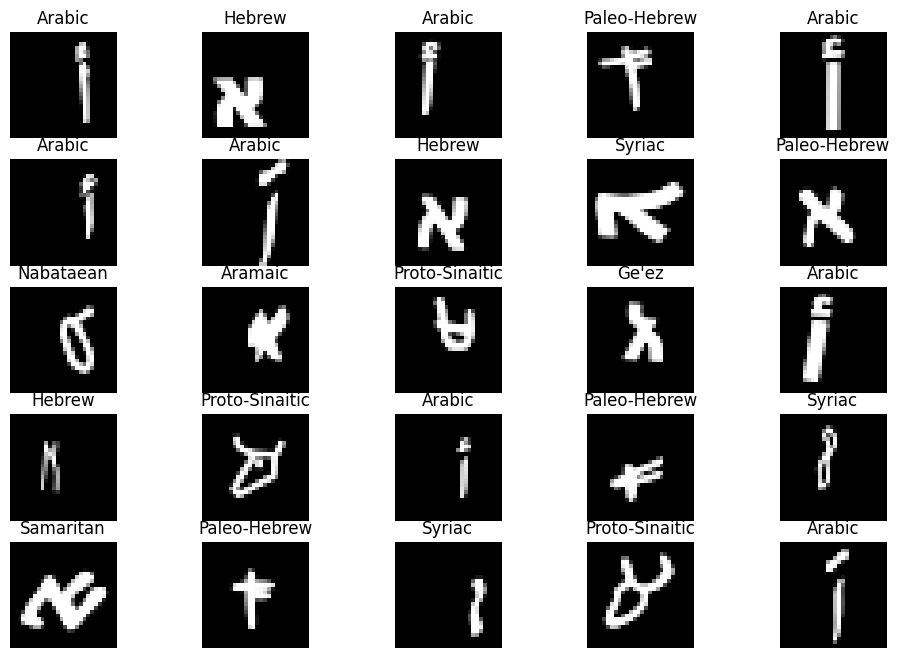

In [5]:
# plot the first 25 images in the train dataset
fig, axes = plt.subplots(5, 5, figsize=(12, 8))
for i, ax in enumerate(axes.flatten()):
    image, label = dataset[i]
    ax.imshow(image[:, :, 0], cmap='gray')
    ax.set_title(dataset.classes[label])
    ax.axis('off')
plt.show()

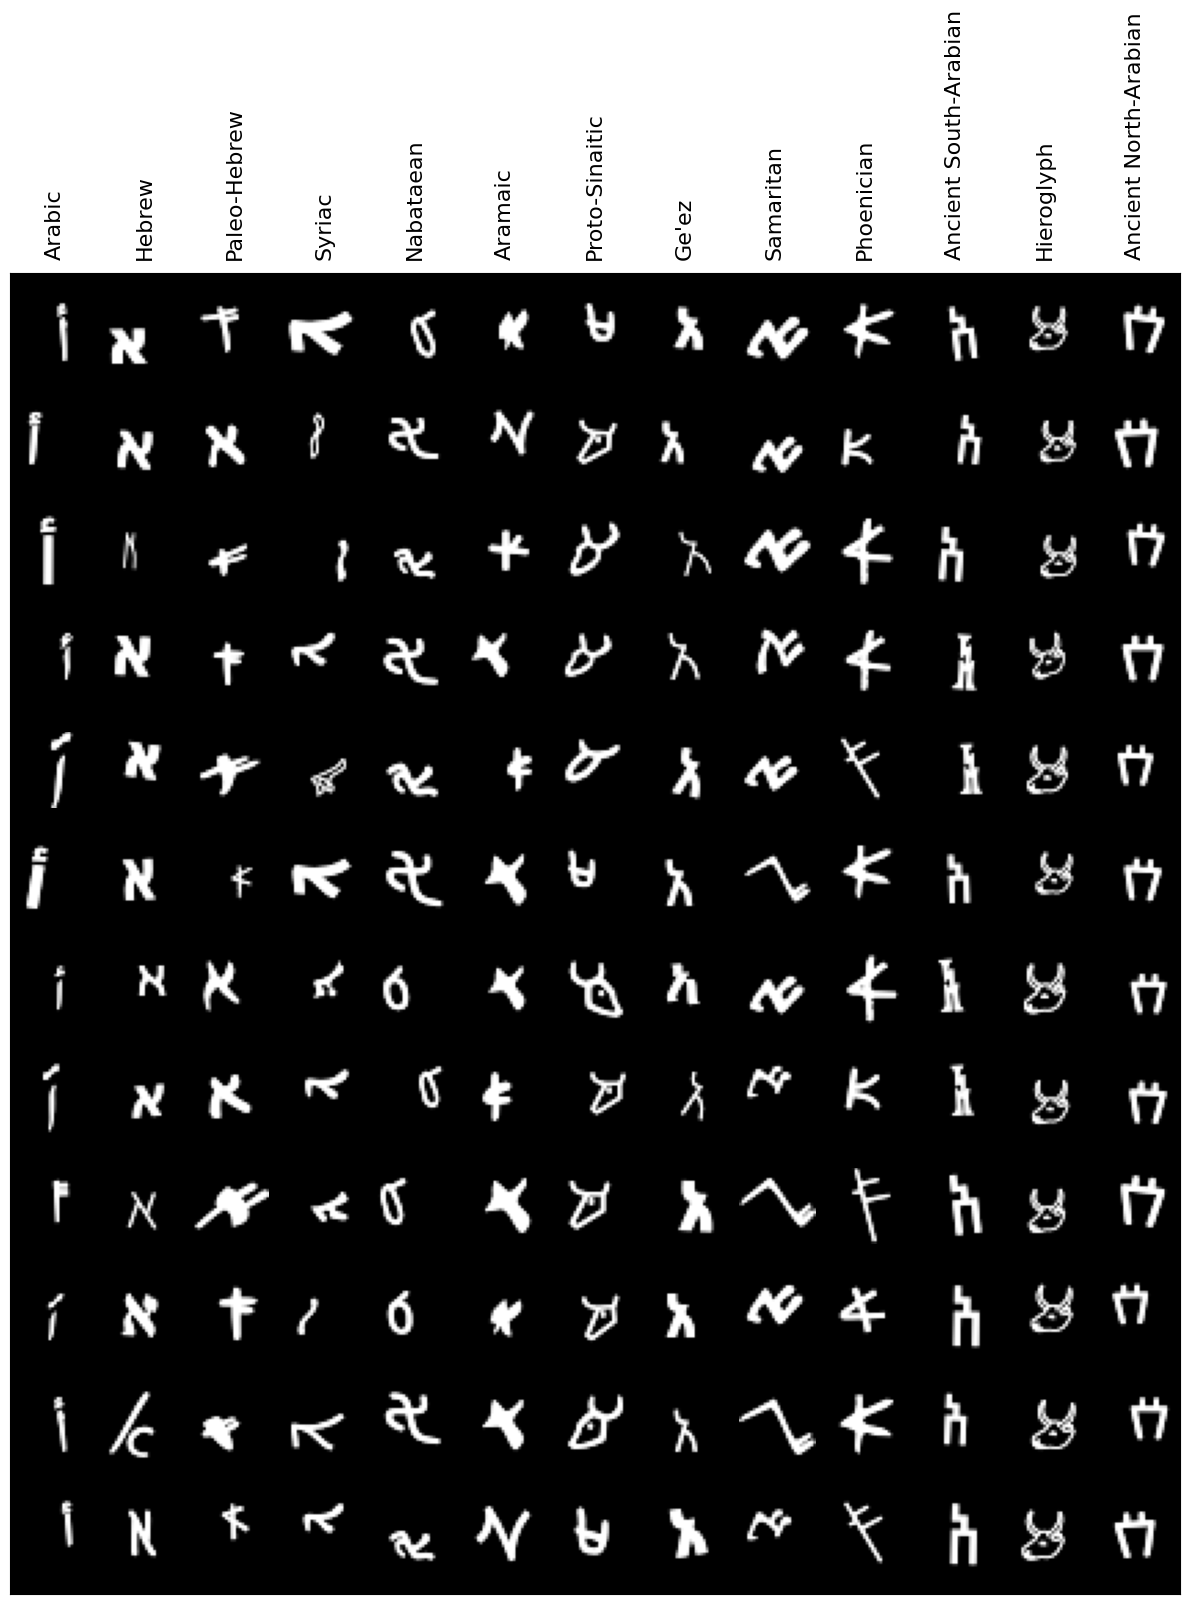

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def gather_data_by_class(dataset, M):
    class_data = {}
    for image, label in dataset:
        label = dataset.classes[label]
        if label not in class_data:
            class_data[label] = []
        if len(class_data[label]) < M:
            class_data[label].append(image)
        if all(len(images) >= M for images in class_data.values()):
            break
    return class_data

def plot_images_in_grid(class_data):
    num_classes = len(class_data)
    num_rows = len(class_data[list(class_data.keys())[0]])
    num_cols = num_classes

    fig, ax = plt.subplots(1, 1, figsize=(12, 16))
    ax.set_facecolor('black')
    ax.set_xticks([])
    ax.set_yticks([])

    for i, (label, images) in enumerate(class_data.items()):
        x, y = (i + 0.5) / num_classes, 1.01
        ax.text(x, y, label, fontsize=16, ha='center', va='bottom', rotation=90)
        for j in range(num_rows):
            image = images[j]
            ax_index = j * num_classes + i + 1
            ax_ij = fig.add_subplot(num_rows, num_cols, ax_index)
            ax_ij.imshow(image[:, :, 0], cmap='gray')
            ax_ij.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming you have a 'train_dataset' object and 'train_dataset.classes' attribute available

M = 12
class_data = gather_data_by_class(dataset, M)
plot_images_in_grid(class_data)
